<a href="https://colab.research.google.com/github/sessihode/Projet-2/blob/main/Mod%C3%A8le_vin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projet : Modèle de Machine Learning pour prédire le score de qualité d'un vin
Compréhension de la problématique

La production du vin : une histoire d'argent :

Selon l'Organisation Internationale de la Vigne et du Vin, la production mondiale de vin en 2019 est de 293 562 000 hl. Le vin est une grande source de recettes pour les pays qui en produisent. Par exemple, les exportations du vin ont rapporté à la France (premier pays producteur au niveau mondial avec environ 16% de la production mondiale) 7,6 milliards d’euros en 2012 (La Revue du Vin de France).

Si vous ne faites pas bien les choses, vous risquez de perdre beaucoup d'argent dans ce business surtout si votre vin n'est pas certifié de bonne qualité
Un problème majeur dans ce business est la certification du vin qui empêche sa falsification illégale et assure sa qualité. La certification des vins est souvent évaluée par des tests physicochimiques et sensoriels. Actuellement l'analyse sensorielle est effectuée par des dégustateurs humains, ce qui est clairement une approche subjective. De plus, les relations entre l'analyse physico-chimique et sensorielle ne sont pas encore entièrement comprises. Comment améliorer d'une part la certification du vin en utilisant une approche beaucoup plus scientifique et d'autre part comment aider les producteurs à anticiper sur la qualité de leur vin et ainsi avoir de meilleurs chiffres d'affaires ?

Data Mining et Machine Learning
Les techniques d'exploration des données (Data Mining en Anglais) ainsi que les algorithmes de Machine Learning peuvent contribuer à résoudre ce problème majeur. En appliquant les techniques de Data Mining sur les données physico-chimiques du vin, on peut d'une part extraire de ces données brutes des informations utiles permettant de comprendre la relation entre les paramètres physico-chimiques du vin et sa qualité. Ainsi, certains paramètres pourront être mieux contrôlées lors du processus de production afin de garantir et d'améliorer la qualité du vin. D'autre part, grâce aux algorithmes de Machine Learning on peut construire un modèle de prédiction de la qualité du vin ce qui sera très utile dans la phase de certification. Un tel modèle peut être intégré dans un système d'aide à la décision, contribuant à la rapidité et à la qualité des performances de l'œnologue. De plus, un tel système de prédiction peut également être utile pour la formation d'étudiants et de professionnels en œnologie ou à des fins de marketing.

Dans ce projet, nous allons construire un modèle de Machine Learning pour prédire le score de qualité d'un vin. L'objectif est de trouver les attributs nécessaires pour fabriquer un vin de qualité afin d'aider les producteurs à optimiser leurs efforts.

Pour traiter ce projet, nous allons suivre les étapes suivantes :

Compréhension de la problématique Business ;

Collecte des données ;

Analyse exploratoire ;

Prétraitement des données ;

Modélisation ;

Résultats et conclusion.

#Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#Importation des données

Les données utilisées dans le cadre de cette étude proviennent de UCI Machine Learning Repository. Il s'agit de deux ensembles de données liés aux variantes rouges et blanches du vin portugais "Vinho Verde". En raison de problèmes de confidentialité et de logistique, seules les variables physico-chimiques (variables indépendantes) et sensorielles (variable dépendante ou variable cible) sont disponibles. Par exemple, il n'y a pas de données sur les types de raisins, la marque de vin, le prix de vente du vin, etc.).

Les variables indépendantes (basées sur des tests physico-chimiques) sont :

fixed acidity : acidité fixe
volatile acidity : acidité volatile
citric acid : acidité citrique
residual sugar : sucre résiduel
chlorides : chlorures
free sulfur dioxide : anhydride sulfureux libre
total sulfur dioxide : dioxyde de soufre total
density : densité
pH : pH
sulphates : sulfates
alcohol : alcool
La variable dépendante ou variable d'intérête (basée sur des données sensorielles) est :

quality : qualité (échelle allant de 0 à 10, qui correspond respectivement à une qualité très mauvaise à une qualité excellente)

In [2]:
df_red =  pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_white =  pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [3]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df_red["wine_type"] = 1
df_white["wine_type"] = 0

In [6]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
# Concaténation
df_raw = pd.concat([df_red,df_white])
df_raw

# Don't use merge as thats when there are overlapping elements in the datasets

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


#Analyse exploratoire

In [9]:
# Résumé statistique
df_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [10]:
# Nombre de valeurs manquantes par colonne
df_raw.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [11]:
# Variable cible
df_raw['quality'].value_counts(normalize=True)

,proportion
quality,
6,0.436509
5,0.329075
7,0.166077
4,0.033246
8,0.029706
3,0.004618
9,0.000770


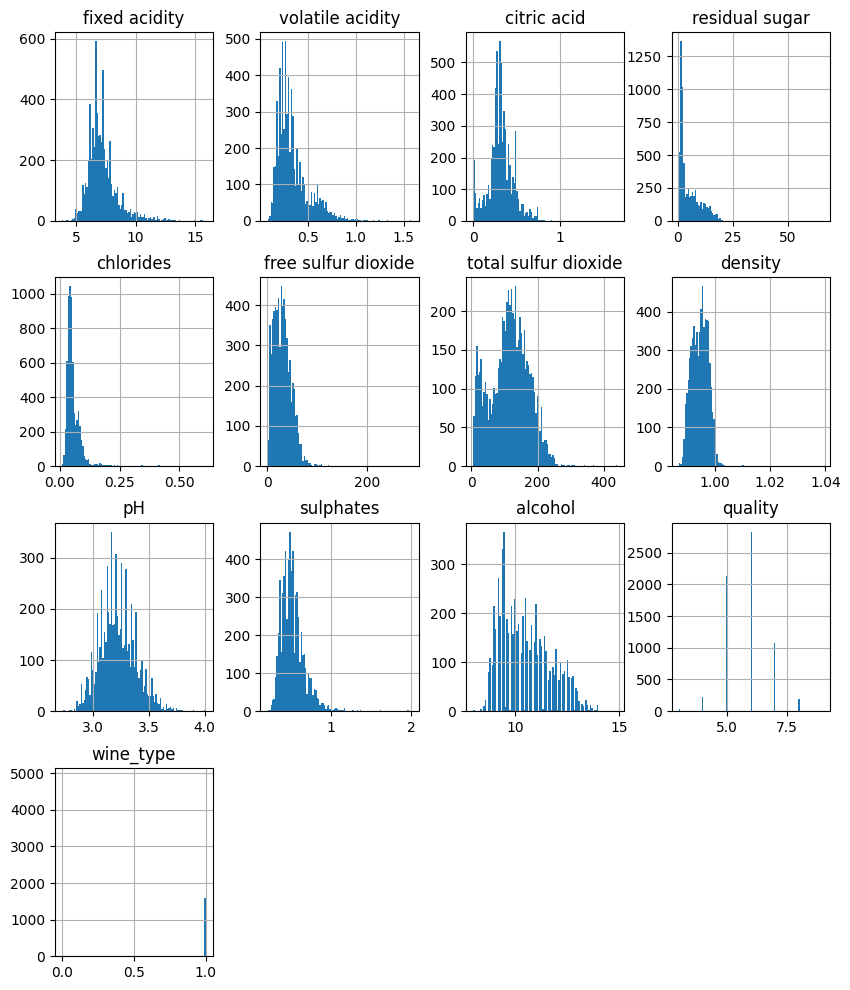

In [12]:
# Histogrammes
df_raw.hist(bins = 100, figsize = (10,12))
plt.show()

Hypothèse : On peut supposer qu'un très bon vin a un score de qualité >= à 7 et un vin de faible qualité a un score < 7. Dans ce cas, il serait intéressant de comparer les statistiques des variables pour ces deux groupes de vin :

In [13]:
# Statistiques pour les vins de très grande qualité (selon l'hypothèse ci-dessus)
df_raw[df_raw.quality >= 7].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,1277.000000,1277.00000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000
mean,7.085709,0.28917,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966,0.169930
std,1.342832,0.11696,0.110040,4.063824,0.021014,15.344154,47.126201,0.003007,0.159094,0.161521,1.215620,0.376348,0.375718
min,3.900000,0.08000,0.000000,0.800000,0.012000,3.000000,7.000000,0.987110,2.840000,0.220000,8.500000,7.000000,0.000000
25%,6.300000,0.20000,0.280000,1.800000,0.033000,20.000000,87.000000,0.990720,3.120000,0.420000,10.700000,7.000000,0.000000
50%,6.900000,0.27000,0.320000,2.900000,0.039000,31.000000,114.000000,0.992280,3.220000,0.510000,11.500000,7.000000,0.000000
75%,7.400000,0.34000,0.380000,6.500000,0.051000,40.000000,140.000000,0.995000,3.340000,0.640000,12.400000,7.000000,0.000000
max,15.600000,0.91500,0.760000,19.250000,0.358000,108.000000,289.000000,1.003200,3.820000,1.360000,14.200000,9.000000,1.000000


In [14]:
# Statistiques pour les vins de faible qualité (selon l'hypothèse ci-dessus)
df_raw[df_raw.quality < 7].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000
mean,7.247011,0.352019,0.314720,5.593812,0.058837,30.395690,117.176533,0.995105,3.216262,0.528768,10.261462,5.490421,0.264751
std,1.282968,0.172094,0.152466,4.901269,0.037145,18.288715,58.506354,0.002852,0.161135,0.145434,1.067408,0.605987,0.441243
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987220,2.720000,0.230000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.040000,16.000000,74.000000,0.993000,3.110000,0.430000,9.400000,5.000000,0.000000
50%,7.000000,0.300000,0.300000,3.000000,0.049000,28.000000,119.000000,0.995400,3.200000,0.510000,10.000000,6.000000,0.000000
75%,7.700000,0.430000,0.400000,8.300000,0.069000,42.000000,160.000000,0.997200,3.320000,0.590000,11.000000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,6.000000,1.000000


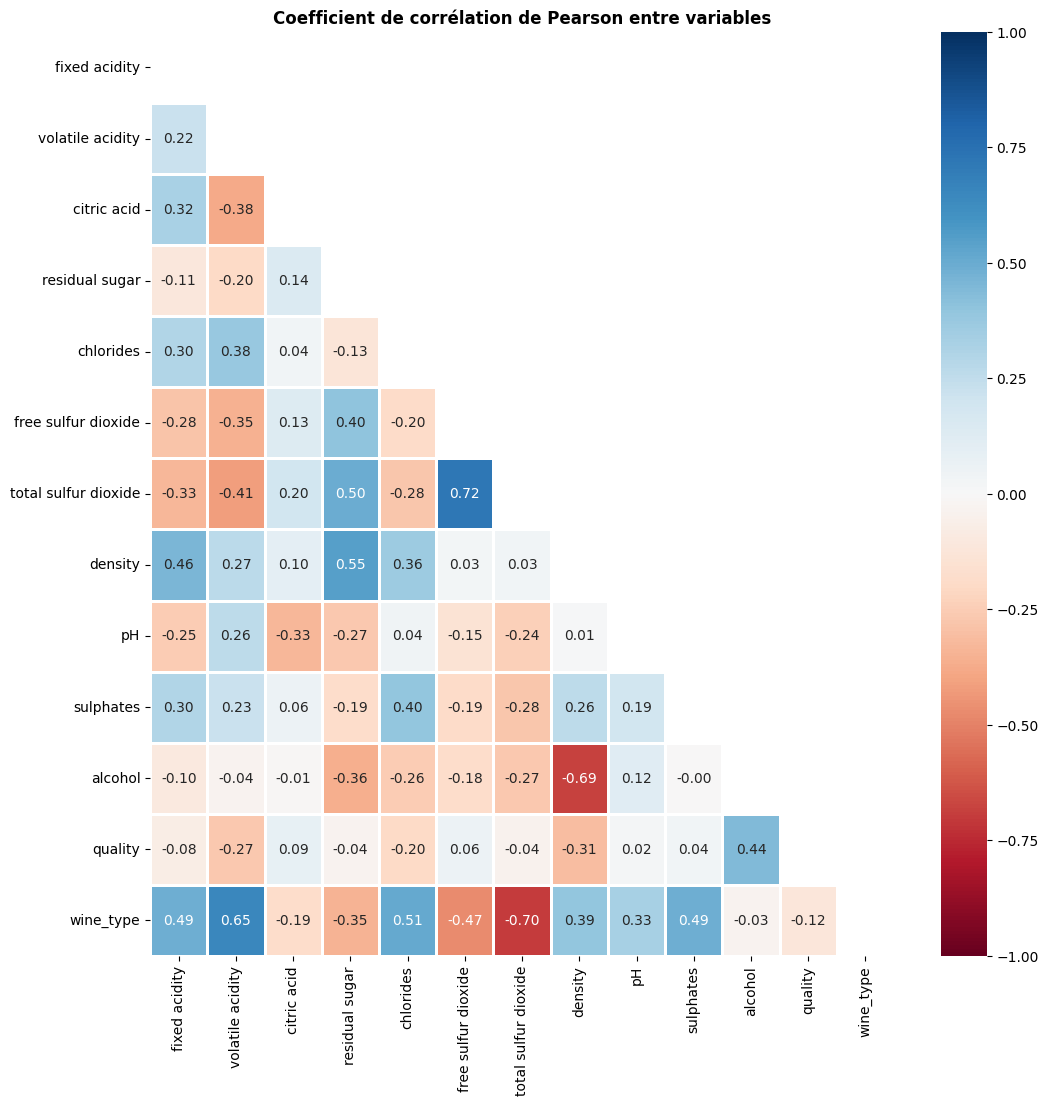

In [15]:
# Matrice de corrélation
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(df_raw.corr(), dtype=bool))
sns.heatmap(df_raw.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Coefficient de corrélation de Pearson entre variables', fontweight="bold")
plt.show()

#Pétraitemment

In [16]:
# Données d'entrainement et de test
from sklearn.model_selection import train_test_split
X = df_raw.drop(['quality'],axis=1)
y = df_raw['quality']

seed = 33
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5197, 12) (5197,) (1300, 12) (1300,)


In [17]:
# Standardisation
# https://scikit-learn.org/stable/modules/preprocessing.html

std_scaler = StandardScaler()
std_scaled_X_train = std_scaler.fit_transform(X_train)
std_scaled_X_test = std_scaler.transform(X_test)

In [18]:
# Evaluation de potentiels modèles
# https://scikit-learn.org/stable/modules/model_evaluation.html

lr_cve = cross_val_score(LinearRegression(), std_scaled_X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
rf_cve = cross_val_score(RandomForestRegressor(random_state=seed), std_scaled_X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
svm_cve = cross_val_score(SVR(), std_scaled_X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')

In [19]:
print(lr_cve)
print(rf_cve)
print(svm_cve)

[-0.73253584 -0.73110956 -0.72582852]
[-0.62019518 -0.63840678 -0.6369258 ]
[-0.67342018 -0.68137323 -0.67191659]


In [20]:
print(f'Linear Regression RMSE score: {lr_cve.mean()}')
print(f'RF RMSE score:{rf_cve.mean()}')
print(f'SVM RMSE score: {svm_cve.mean()}')

Linear Regression RMSE score: -0.7298246371416165
RF RMSE score:-0.6318425906491011
SVM RMSE score: -0.6755700011223958


Le modèle de forêt aléatoire est le meilleur des 3 selon l'erreur quadratique moyenne.

#Construction du modèle

In [21]:
rf_model = RandomForestRegressor(random_state=seed)
rf_model.fit(std_scaled_X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
# Prédictions
y_pred = rf_model.predict(std_scaled_X_test)
y_pred

array([6.4 , 5.82, 6.25, ..., 5.38, 5.09, 4.98])

In [24]:
!pip install -U scikit-learn

In [27]:
# Mesure de la performance sur les données de test
mean_squared_error(y_test, y_pred)

0.397891

#Conclusion : Attributs importants

In [28]:
rf_model.feature_importances_

array([0.05438907, 0.128995  , 0.06012551, 0.07411797, 0.06590424,
       0.08302336, 0.0727574 , 0.05769381, 0.06995162, 0.07491607,
       0.25618198, 0.00194397])

In [29]:
vars_imp = pd.Series(rf_model.feature_importances_, index = X.columns).sort_values(ascending=False)
vars_imp

,0
alcohol,0.256182
volatile acidity,0.128995
free sulfur dioxide,0.083023
sulphates,0.074916
residual sugar,0.074118
total sulfur dioxide,0.072757
pH,0.069952
chlorides,0.065904
citric acid,0.060126
density,0.057694


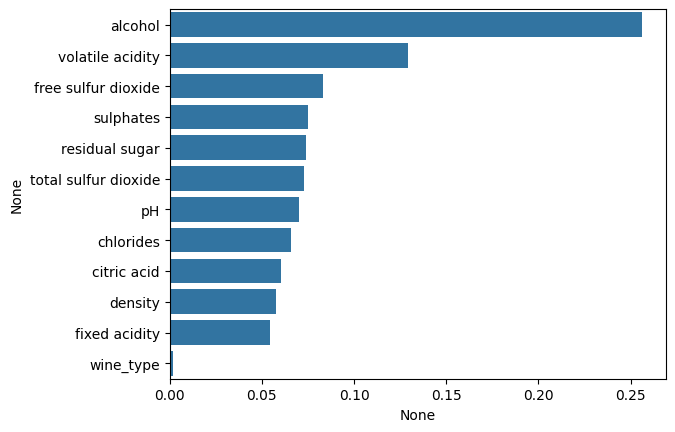

In [30]:
sns.barplot(x=vars_imp, y=vars_imp.index);